<h1> World Happiness Index Model </h1>

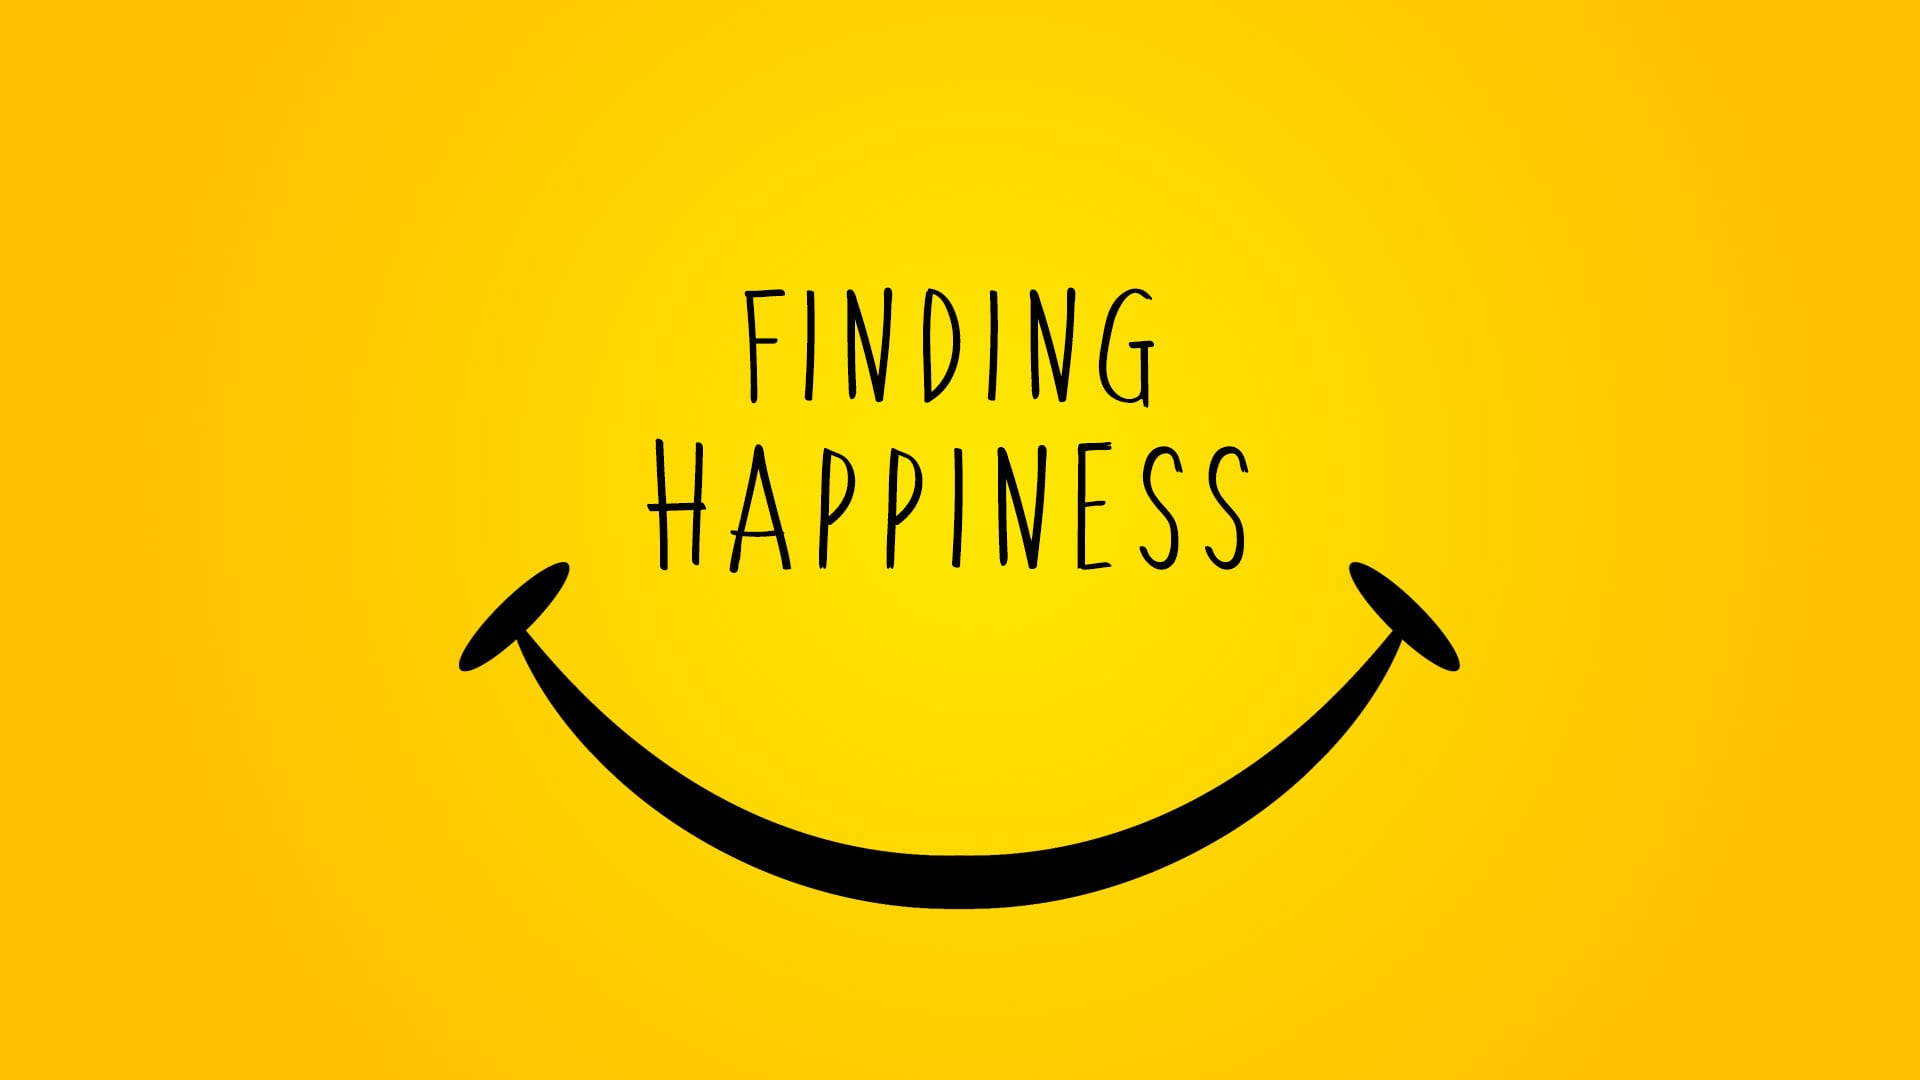

<h2>In this notebook I will be going over the dataset of the World Happiness Index of 2019 to try and determine specific factors that correlate to a high happiness index. </h2> <br>

<h2> <u>Problem Definition</u> </h2> 

<h3> I am trying to find which factors have the highest correlation to a high happiness score. <br>Obviously, if a category like "Healthy Life Expectancy" has a low value then that will have a bad correlation to the happiness score. <br>But what I am most interested in though is which column with a high value will still have a bad correlation to the happiness score.</h3>

<h2> <u>Exploratory Data Analysis</u> </h2> 

<h3> Here are the different features that make up the dataset that I am using. I will also drop the Country or region column with the country names and the overall rank column because it won't add anything to help the model.</h3>


<h3> I will be using the "Score" feature as my predictor variable. </h3>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv('WorldHappinessIndex2019.csv', delimiter=",")
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<h3> Shown below is the overall description of the entire dataset. <br><br> As you can see the standard deviations of each column are relatively small. Also, the overall mean of the 'Score' column is 5, with the #1 country being at 7.769 so the mean of the world happiness score isn't too bad. </h3>

In [2]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<h3> You can also see that there are a couple columns that have a minimum value of 0 which we dont want, so we will impute based on the average of the values above and below the 0.</h3>

<h3> Below is where I impute the data and then if we call the same function used above, it will show that there are no more 0 values. </h3>

In [4]:
# This replaces all zeroes with nan

import numpy as np
df[df.eq(0)] = np.nan

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df = pd.DataFrame(imputer.fit_transform(df))

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
df.columns = ['Score','GDP per capita','Social support', 'Healthy life expectancy'
              , 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

<h2><u>Feature Segmentation</u></h2>

In [5]:
import pandas as pd

# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

# # Create data frame without ID and target variable columns.

# del df['Satisfaction']

# Display all columns of the data frame.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.head(2))
warnings.filterwarnings("ignore")

# Bartlett's test of sphericity checks for enough correlation.
# A small p-value indicates that enough correlation exists.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df)

print("\nBartlett's test chi-square value: ")
print(chi_square_value)

print("\nBartlett's test p-value: ")
print(p_value)

# Kaiser-Meyer-Olkin (KMO) test checks for common variance.
# Factor analysis is suitable for scores of 0.6 (and
# sometimes 0.5) and above.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print("\nKaiser-Meyer-Olkin (KMO) Test")
print(kmo_model)

# Create components loading vectors without rotation
# and obtain the Eigenvalues.
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

ev, v = fa.get_eigenvalues()
print("\nEignenvalues:")
print(ev)

# Pick factors where eigenvalues are greater than 1.
fa = FactorAnalyzer(rotation="varimax",n_factors=2)
fa.fit(df)

# Create formatted factor loading matrix.
dfFactors = pd.DataFrame(fa.loadings_)
dfFactors['Categories'] = list(df.keys())
dfFactors = dfFactors.rename(columns={0:'Factor 1',
          1:'Factor 2', 2:'Factor 3', 3:'Factor 4'})
print("\nFactors: ")
print(dfFactors)



   Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
0  7.769           1.340           1.587                    0.986                         0.596       0.153                      0.393
1  7.600           1.383           1.573                    0.996                         0.592       0.252                      0.410

Bartlett's test chi-square value: 
679.3983260724755

Bartlett's test p-value: 
2.977623700823043e-130

Kaiser-Meyer-Olkin (KMO) Test
0.8340585223845253

Eignenvalues:
[3.82509495 1.41951341 0.61521633 0.56875235 0.25842885 0.17118771
 0.14180641]

Factors: 
   Factor 1  Factor 2                    Categories
0  0.868441  0.319160                         Score
1  0.915752  0.068961                GDP per capita
2  0.835244  0.073839                Social support
3  0.885019  0.099383       Healthy life expectancy
4  0.411562  0.553433  Freedom to make life choices
5 -0.115293  0.564996  

<h3> The features that influence the first factor are a good GDP per capita, Social support, and Healthy life expectancy. This could be an indicator that companies with good social programs correlate to a good happiness score. <br><br> For the second factor, the features that are most relevant are Freedom to make life choices, Generosity, and Perceptions of corruption. This could be a good indicator that first world countries that prioritize democracy and safety of their citizens correlate to a good happiness score. </h3>

<br>
<h2><u>Data Treatment</u></h2>
<h3>I initially dropped the first two columns which are the index and the name of the country, since I don't think they would have any influence on the model. <br> Also, some columns had a 0 as the minimum value, which I did not want in my model because it would wrongly lower the average. <br> So I used the KNN Imputer to get the average of the 4 neighbors around the 0 value. I also used binning to see if there was a specific range of values that helped the RMSE value. <br> The ranges that I determined were the most helpful are GDPBin_(0.912, 1.684], SocialBin_(1.2, 1.624]. Considering the original columns had significant p-values, it makes sense that only the binning for these two columns had the best results.</h3>

<h3> Now I am going to run an OLS model to find the bad features then bin the good features and run the OLS model again.  </h3>

In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm

X = df[['GDP per capita', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           1.56e-40
Time:                        15:50:02   Log-Likelihood:                -89.887
No. Observations:                 124   AIC:                             189.8
Df Residuals:                     119   BIC:                             203.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9787      0.213      9.300      0.0

<h3> Shown in the model summary is that there are a couple of features that don't provide any good insight into our prediction so we can drop those features and then also bin the good categories to see if that will have a positive effect on the RMSE. </h3>

In [7]:
df['GDPBin'] = pd.cut(x=df['GDP per capita'], bins=[0,0.3,0.71,0.912, 1.684])
df['SocialBin'] = pd.cut(x=df['Social support'], bins=[0,0.572,1.2,1.624])

tempDf = df[['GDPBin','SocialBin']]

dummyDf = pd.get_dummies(tempDf, columns=['GDPBin','SocialBin'])

df = pd.concat(([df, dummyDf]),axis=1)


In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm



X = df[['Freedom to make life choices','Perceptions of corruption','GDPBin_(0.0, 0.3]',
        'GDPBin_(0.3, 0.71]','GDPBin_(0.71, 0.912]','GDPBin_(0.912, 1.684]','SocialBin_(0.0, 0.572]','SocialBin_(0.572, 1.2]',
        'SocialBin_(1.2, 1.624]']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     44.14
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           1.35e-31
Time:                        15:50:10   Log-Likelihood:                -102.42
No. Observations:                 124   AIC:                             222.8
Df Residuals:                     115   BIC:                             248.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0885      0.464      6.659      0.0

<h3> With a bit of binning, you can already see the RMSE value drop by .02 points. Now let's drop the bad features and see if the RMSE improves at all. </h3>

In [10]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm



X = df[['Freedom to make life choices','Perceptions of corruption',
        'GDPBin_(0.912, 1.684]',
        'SocialBin_(1.2, 1.624]']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     84.71
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           6.84e-34
Time:                        15:50:19   Log-Likelihood:                -105.90
No. Observations:                 124   AIC:                             221.8
Df Residuals:                     119   BIC:                             235.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4120      0.151     22.647      0.0

<h3>After dropping the bad binned features, the RMSE on the model drops another .02. That's not bad for just a little bit of binning. </h3>

<h3>The conclusion is that the features that are the most relevant are 'Freedom to make life choices' and 'Perceptions of corruption' while the values of GDP per capita give best results between 0.912 and 1.684, also the values of Social support give the best result between 1.2 and 1.624 </h3>

<h3> Now let's look at making a neural net and see if the RMSE value improves at all. </h3>

<h3> We first have to find what the baseline RMSE value is of a neural network. </h3>

In [12]:
import pandas as pd
import numpy  as np
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from keras.models            import Sequential
from keras.layers            import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")

df = pd.read_csv('WorldHappinessIndex2019.csv', delimiter=",")
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

import numpy as np
df[df.eq(0)] = np.nan

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df = pd.DataFrame(imputer.fit_transform(df))

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
df.columns = ['Score','GDP per capita','Social support', 'Healthy life expectancy'
              , 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [35]:
warnings.filterwarnings("ignore")
dataset = df.values
X       = dataset[:, 1:6] 
y       = dataset[:,0] #predictor

ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

# Split the data.
X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped, 
         y_arrayReshaped, test_size=0.2, random_state=0)


# Define the model.
def create_model():
   model = Sequential()
   model.add(Dense(5, input_dim=5, kernel_initializer='normal', 
             activation='relu'))
   model.add(Dense(1, kernel_initializer='normal'))
   model.compile(loss='mean_squared_error', optimizer='adam')
   return model

# Since this is a linear regression use KerasRegressor.
estimator = KerasRegressor(build_fn=create_model, epochs=100,
                           batch_size=5, verbose=1)

# Use kfold analysis for a more reliable estimate.
kfold   = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline Mean (%.2f) MSE (%.2f) " % (results.mean(), results.std()))
print("Baseline RMSE: " + str(np.sqrt(results.std())))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Build the model.
model   = create_model()
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=5, verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model.
predictions = model.predict(X_test)
mse         = metrics.mean_squared_error(y_test, predictions)
print("Neural network MSE: " + str(mse))
print("Neural network RMSE: " + str(np.sqrt(mse)))



Epoch 1/100
23/23 [==============================] - 0s 680us/step - loss: 30.4592
Epoch 2/100
23/23 [==============================] - 0s 816us/step - loss: 29.8264
Epoch 3/100
23/23 [==============================] - 0s 680us/step - loss: 28.8374
Epoch 4/100
23/23 [==============================] - 0s 680us/step - loss: 27.3893
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 25.5405
Epoch 6/100
23/23 [==============================] - 0s 907us/step - loss: 23.3208
Epoch 7/100
23/23 [==============================] - 0s 861us/step - loss: 20.8533
Epoch 8/100
23/23 [==============================] - 0s 680us/step - loss: 18.1685
Epoch 9/100
23/23 [==============================] - 0s 680us/step - loss: 15.4558
Epoch 10/100
23/23 [==============================] - 0s 680us/step - loss: 12.7746
Epoch 11/100
23/23 [==============================] - 0s 680us/step - loss: 10.2609
Epoch 12/100
23/23 [==============================] - 0s 726us/step - loss: 7.9325
Epoc

23/23 [==============================] - 0s 679us/step - loss: 0.2506
Epoch 100/100
3/3 [==============================] - 0s 998us/step - loss: 0.4025
Epoch 1/100
23/23 [==============================] - 0s 635us/step - loss: 30.2922
Epoch 2/100
23/23 [==============================] - 0s 635us/step - loss: 29.6162
Epoch 3/100
23/23 [==============================] - 0s 997us/step - loss: 28.5964
Epoch 4/100
23/23 [==============================] - 0s 680us/step - loss: 27.1709
Epoch 5/100
23/23 [==============================] - 0s 606us/step - loss: 25.3701
Epoch 6/100
23/23 [==============================] - 0s 677us/step - loss: 23.2155
Epoch 7/100
23/23 [==============================] - 0s 589us/step - loss: 20.7577
Epoch 8/100
23/23 [==============================] - 0s 635us/step - loss: 18.1200
Epoch 9/100
23/23 [==============================] - 0s 635us/step - loss: 15.3865
Epoch 10/100
23/23 [==============================] - 0s 635us/step - loss: 12.7410
Epoch 11/100
23/2

23/23 [==============================] - 0s 635us/step - loss: 0.2497
Epoch 98/100
23/23 [==============================] - 0s 636us/step - loss: 0.2497
Epoch 99/100
23/23 [==============================] - 0s 652us/step - loss: 0.2492
Epoch 100/100
3/3 [==============================] - 0s 998us/step - loss: 0.3763
Epoch 1/100
23/23 [==============================] - 0s 636us/step - loss: 31.0384
Epoch 2/100
23/23 [==============================] - 0s 636us/step - loss: 30.5477
Epoch 3/100
23/23 [==============================] - 0s 635us/step - loss: 29.8879
Epoch 4/100
23/23 [==============================] - 0s 627us/step - loss: 29.0273
Epoch 5/100
23/23 [==============================] - 0s 680us/step - loss: 27.9345
Epoch 6/100
23/23 [==============================] - 0s 655us/step - loss: 26.6174
Epoch 7/100
23/23 [==============================] - 0s 589us/step - loss: 25.1115
Epoch 8/100
23/23 [==============================] - 0s 591us/step - loss: 23.4497
Epoch 9/100
23/23 

Epoch 95/100
23/23 [==============================] - 0s 635us/step - loss: 0.2642
Epoch 96/100
23/23 [==============================] - 0s 724us/step - loss: 0.2637
Epoch 97/100
23/23 [==============================] - 0s 635us/step - loss: 0.2636
Epoch 98/100
23/23 [==============================] - 0s 635us/step - loss: 0.2635
Epoch 99/100
23/23 [==============================] - 0s 589us/step - loss: 0.2634
Epoch 100/100
3/3 [==============================] - 0s 998us/step - loss: 0.2826
Epoch 1/100
23/23 [==============================] - 0s 589us/step - loss: 29.8743
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 29.5489
Epoch 3/100
23/23 [==============================] - 0s 786us/step - loss: 29.1321
Epoch 4/100
23/23 [==============================] - 0s 627us/step - loss: 28.5998
Epoch 5/100
23/23 [==============================] - 0s 589us/step - loss: 27.9515
Epoch 6/100
23/23 [==============================] - 0s 635us/step - loss: 27.1988
Epoch 7

23/23 [==============================] - 0s 635us/step - loss: 0.2819
Epoch 93/100
23/23 [==============================] - 0s 680us/step - loss: 0.2815
Epoch 94/100
23/23 [==============================] - 0s 635us/step - loss: 0.2815
Epoch 95/100
23/23 [==============================] - 0s 635us/step - loss: 0.2820
Epoch 96/100
23/23 [==============================] - 0s 635us/step - loss: 0.2816
Epoch 97/100
23/23 [==============================] - 0s 589us/step - loss: 0.2816
Epoch 98/100
23/23 [==============================] - 0s 635us/step - loss: 0.2817
Epoch 99/100
23/23 [==============================] - 0s 589us/step - loss: 0.2816
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0699
Epoch 1/100
23/23 [==============================] - 0s 680us/step - loss: 30.3383
Epoch 2/100
23/23 [==============================] - 0s 633us/step - loss: 30.0041
Epoch 3/100
23/23 [==============================] - 0s 635us/step - loss: 29.5778
Epoch 4/100
23/23 [=

Epoch 90/100
23/23 [==============================] - 0s 771us/step - loss: 0.2612
Epoch 91/100
23/23 [==============================] - 0s 658us/step - loss: 0.2612
Epoch 92/100
23/23 [==============================] - 0s 635us/step - loss: 0.2610
Epoch 93/100
23/23 [==============================] - 0s 635us/step - loss: 0.2612
Epoch 94/100
23/23 [==============================] - 0s 680us/step - loss: 0.2612
Epoch 95/100
23/23 [==============================] - 0s 635us/step - loss: 0.2613
Epoch 96/100
23/23 [==============================] - 0s 635us/step - loss: 0.2615
Epoch 97/100
23/23 [==============================] - 0s 589us/step - loss: 0.2612
Epoch 98/100
23/23 [==============================] - 0s 643us/step - loss: 0.2611
Epoch 99/100
23/23 [==============================] - 0s 634us/step - loss: 0.2614
Epoch 100/100
3/3 [==============================] - 0s 997us/step - loss: 0.2785
Epoch 1/100
23/23 [==============================] - 0s 665us/step - loss: 29.8229
Epoch

23/23 [==============================] - 0s 673us/step - loss: 0.2634
Epoch 88/100
23/23 [==============================] - 0s 679us/step - loss: 0.2628
Epoch 89/100
23/23 [==============================] - 0s 726us/step - loss: 0.2653
Epoch 90/100
23/23 [==============================] - 0s 698us/step - loss: 0.2625
Epoch 91/100
23/23 [==============================] - 0s 626us/step - loss: 0.2628
Epoch 92/100
23/23 [==============================] - 0s 635us/step - loss: 0.2628
Epoch 93/100
23/23 [==============================] - 0s 659us/step - loss: 0.2626
Epoch 94/100
23/23 [==============================] - 0s 658us/step - loss: 0.2623
Epoch 95/100
23/23 [==============================] - 0s 680us/step - loss: 0.2624
Epoch 96/100
23/23 [==============================] - 0s 626us/step - loss: 0.2622
Epoch 97/100
23/23 [==============================] - 0s 675us/step - loss: 0.2623
Epoch 98/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2627
Epoch 99/100
23/23 

23/23 [==============================] - 0s 679us/step - loss: 0.2652
Epoch 86/100
23/23 [==============================] - 0s 724us/step - loss: 0.2647
Epoch 87/100
23/23 [==============================] - 0s 635us/step - loss: 0.2637
Epoch 88/100
23/23 [==============================] - 0s 689us/step - loss: 0.2645
Epoch 89/100
23/23 [==============================] - 0s 635us/step - loss: 0.2639
Epoch 90/100
23/23 [==============================] - 0s 590us/step - loss: 0.2633
Epoch 91/100
23/23 [==============================] - 0s 588us/step - loss: 0.2630
Epoch 92/100
23/23 [==============================] - 0s 635us/step - loss: 0.2629
Epoch 93/100
23/23 [==============================] - 0s 690us/step - loss: 0.2628
Epoch 94/100
23/23 [==============================] - 0s 616us/step - loss: 0.2628
Epoch 95/100
23/23 [==============================] - 0s 680us/step - loss: 0.2626
Epoch 96/100
23/23 [==============================] - 0s 712us/step - loss: 0.2627
Epoch 97/100
23/2

Epoch 83/100
23/23 [==============================] - 0s 653us/step - loss: 0.2522
Epoch 84/100
23/23 [==============================] - 0s 613us/step - loss: 0.2522
Epoch 85/100
23/23 [==============================] - 0s 606us/step - loss: 0.2519
Epoch 86/100
23/23 [==============================] - 0s 638us/step - loss: 0.2516
Epoch 87/100
23/23 [==============================] - 0s 680us/step - loss: 0.2521
Epoch 88/100
23/23 [==============================] - 0s 681us/step - loss: 0.2519
Epoch 89/100
23/23 [==============================] - 0s 619us/step - loss: 0.2522
Epoch 90/100
23/23 [==============================] - 0s 635us/step - loss: 0.2526
Epoch 91/100
23/23 [==============================] - 0s 628us/step - loss: 0.2518
Epoch 92/100
23/23 [==============================] - 0s 635us/step - loss: 0.2528
Epoch 93/100
23/23 [==============================] - 0s 635us/step - loss: 0.2513
Epoch 94/100
23/23 [==============================] - 0s 674us/step - loss: 0.2511
Epoc

23/23 [==============================] - 0s 659us/step - loss: 0.2719
Epoch 81/100
23/23 [==============================] - 0s 684us/step - loss: 0.2717
Epoch 82/100
23/23 [==============================] - 0s 649us/step - loss: 0.2719
Epoch 83/100
23/23 [==============================] - 0s 692us/step - loss: 0.2719
Epoch 84/100
23/23 [==============================] - 0s 699us/step - loss: 0.2715
Epoch 85/100
23/23 [==============================] - 0s 715us/step - loss: 0.2717
Epoch 86/100
23/23 [==============================] - 0s 635us/step - loss: 0.2714
Epoch 87/100
23/23 [==============================] - 0s 635us/step - loss: 0.2714
Epoch 88/100
23/23 [==============================] - 0s 589us/step - loss: 0.2713
Epoch 89/100
23/23 [==============================] - 0s 593us/step - loss: 0.2714
Epoch 90/100
23/23 [==============================] - 0s 638us/step - loss: 0.2711
Epoch 91/100
23/23 [==============================] - 0s 591us/step - loss: 0.2711
Epoch 92/100
23/2

23/23 [==============================] - 0s 680us/step - loss: 0.2809
Epoch 79/100
23/23 [==============================] - 0s 708us/step - loss: 0.2809
Epoch 80/100
23/23 [==============================] - 0s 680us/step - loss: 0.2812
Epoch 81/100
23/23 [==============================] - 0s 666us/step - loss: 0.2815
Epoch 82/100
23/23 [==============================] - 0s 662us/step - loss: 0.2812
Epoch 83/100
23/23 [==============================] - 0s 669us/step - loss: 0.2808
Epoch 84/100
23/23 [==============================] - 0s 700us/step - loss: 0.2802
Epoch 85/100
23/23 [==============================] - 0s 680us/step - loss: 0.2805
Epoch 86/100
23/23 [==============================] - 0s 698us/step - loss: 0.2812
Epoch 87/100
23/23 [==============================] - 0s 681us/step - loss: 0.2803
Epoch 88/100
23/23 [==============================] - 0s 679us/step - loss: 0.2797
Epoch 89/100
23/23 [==============================] - 0s 705us/step - loss: 0.2802
Epoch 90/100
23/2

25/25 [==============================] - 0s 1ms/step - loss: 0.2669 - val_loss: 0.3559
Epoch 63/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2667 - val_loss: 0.3553
Epoch 64/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2675 - val_loss: 0.3566
Epoch 65/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2666 - val_loss: 0.3536
Epoch 66/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2662 - val_loss: 0.3574
Epoch 67/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2667 - val_loss: 0.3561
Epoch 68/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2666 - val_loss: 0.3573
Epoch 69/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2666 - val_loss: 0.3539
Epoch 70/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2667 - val_loss: 0.3578
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2658 - val_loss: 0.3561
Epoch 72/100


<h3> As you can see, for our Neural Network baseline, our RMSE value is already lower than the OLS model without any adjustments. Lets adjust some parameters of the model and try to get the RMSE value down even further. </h3>

<h3> We will first try grid searching for better batch size and epoch values.</h3>

In [36]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6] 
y       = dataset[:,0] #predictor

ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV
from tensorflow.keras.optimizers import Adam

# Define the model.
def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal',
                        activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = KerasRegressor(build_fn=create_model)

# define the grid search parameters
batch_size  = [10, 20, 30, 40, 50]
epochs      = [100,200,300,400,500]
param_grid  = dict(batch_size=batch_size, epochs=epochs)
grid        = GridSearchCV(estimator=model, param_grid=param_grid,
                           n_jobs=-1, cv=3, verbose=1)
#################################################

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   23.3s


Epoch 1/400


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   34.8s finished


5/5 [==============================] - 0s 748us/step - loss: 30.4671
Epoch 2/400
5/5 [==============================] - 0s 748us/step - loss: 30.4000
Epoch 3/400
5/5 [==============================] - 0s 1ms/step - loss: 30.3334
Epoch 4/400
5/5 [==============================] - 0s 1ms/step - loss: 30.2645
Epoch 5/400
5/5 [==============================] - 0s 1ms/step - loss: 30.1921
Epoch 6/400
5/5 [==============================] - 0s 1ms/step - loss: 30.1156
Epoch 7/400
5/5 [==============================] - 0s 1ms/step - loss: 30.0352
Epoch 8/400
5/5 [==============================] - 0s 1ms/step - loss: 29.9515
Epoch 9/400
5/5 [==============================] - 0s 1ms/step - loss: 29.8612
Epoch 10/400
5/5 [==============================] - 0s 1ms/step - loss: 29.7674
Epoch 11/400
5/5 [==============================] - 0s 997us/step - loss: 29.6675
Epoch 12/400
5/5 [==============================] - 0s 1ms/step - loss: 29.5625
Epoch 13/400
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 1ms/step - loss: 7.2758
Epoch 103/400
5/5 [==============================] - 0s 1ms/step - loss: 7.0595
Epoch 104/400
5/5 [==============================] - 0s 1ms/step - loss: 6.8495
Epoch 105/400
5/5 [==============================] - 0s 1ms/step - loss: 6.6409
Epoch 106/400
5/5 [==============================] - 0s 1ms/step - loss: 6.4392
Epoch 107/400
5/5 [==============================] - 0s 997us/step - loss: 6.2395
Epoch 108/400
5/5 [==============================] - 0s 1ms/step - loss: 6.0445
Epoch 109/400
5/5 [==============================] - 0s 1ms/step - loss: 5.8519
Epoch 110/400
5/5 [==============================] - 0s 1ms/step - loss: 5.6661
Epoch 111/400
5/5 [==============================] - 0s 997us/step - loss: 5.4850
Epoch 112/400
5/5 [==============================] - 0s 1ms/step - loss: 5.3079
Epoch 113/400
5/5 [==============================] - 0s 1ms/step - loss: 5.1290
Epoch 114/400
5/5 [==============================]

5/5 [==============================] - 0s 991us/step - loss: 0.2922
Epoch 203/400
5/5 [==============================] - 0s 997us/step - loss: 0.2904
Epoch 204/400
5/5 [==============================] - 0s 997us/step - loss: 0.2883
Epoch 205/400
5/5 [==============================] - 0s 741us/step - loss: 0.2864
Epoch 206/400
5/5 [==============================] - 0s 748us/step - loss: 0.2848
Epoch 207/400
5/5 [==============================] - 0s 997us/step - loss: 0.2834
Epoch 208/400
5/5 [==============================] - 0s 748us/step - loss: 0.2822
Epoch 209/400
5/5 [==============================] - 0s 748us/step - loss: 0.2809
Epoch 210/400
5/5 [==============================] - 0s 997us/step - loss: 0.2796
Epoch 211/400
5/5 [==============================] - 0s 997us/step - loss: 0.2784
Epoch 212/400
5/5 [==============================] - 0s 997us/step - loss: 0.2773
Epoch 213/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2763
Epoch 214/400
5/5 [=============

5/5 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 303/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2669
Epoch 304/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 305/400
5/5 [==============================] - 0s 998us/step - loss: 0.2669
Epoch 306/400
5/5 [==============================] - 0s 997us/step - loss: 0.2669
Epoch 307/400
5/5 [==============================] - 0s 997us/step - loss: 0.2669
Epoch 308/400
5/5 [==============================] - 0s 748us/step - loss: 0.2669
Epoch 309/400
5/5 [==============================] - 0s 748us/step - loss: 0.2669
Epoch 310/400
5/5 [==============================] - 0s 748us/step - loss: 0.2669
Epoch 311/400
5/5 [==============================] - 0s 997us/step - loss: 0.2669
Epoch 312/400
5/5 [==============================] - 0s 997us/step - loss: 0.2668
Epoch 313/400
5/5 [==============================] - 0s 997us/step - loss: 0.2670
Epoch 314/400
5/5 [=================

<h3> The best option for batch_size is 20 and epochs is 400. Next, we will grid search for a good optimizer to use in the network </h3>

In [26]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6] 
y       = dataset[:,0] #predictor

ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV

# Define the model.
def create_model(optimizer='SGD'):
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal',
                        activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, epochs=400, batch_size=20, verbose=1)

# define the grid search parameters
optimizer   = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid  = dict(optimizer=optimizer)
grid        = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#################################################

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/400
7/7 [==============================] - 0s 831us/step - loss: 30.4602
Epoch 2/400
7/7 [==============================] - 0s 997us/step - loss: 30.3885
Epoch 3/400
7/7 [==============================] - 0s 835us/step - loss: 30.3153
Epoch 4/400
7/7 [==============================] - 0s 831us/step - loss: 30.2396
Epoch 5/400
7/7 [==============================] - 0s 997us/step - loss: 30.1565
Epoch 6/400
7/7 [==============================] - 0s 831us/step - loss: 30.0698
Epoch 7/400
7/7 [==============================] - 0s 831us/step - loss: 29.9767
Epoch 8/400
7/7 [==============================] - 0s 997us/step - loss: 29.8772
Epoch 9/400
7/7 [==============================] - 0s 997us/step - loss: 29.7691
Epoch 10/400
7/7 [==============================] - 0s 997us/step - loss: 29.6528
Epoch 11/400
7/7 [==============================] - 0s 997us/step - loss: 29.5333
Epoch 12/400
7/7 [==============================] - 0s 1ms/step - loss: 29.4045
Epoch 13/400
7/7 [=========

7/7 [==============================] - 0s 665us/step - loss: 5.0905
Epoch 102/400
7/7 [==============================] - 0s 831us/step - loss: 4.8610
Epoch 103/400
7/7 [==============================] - 0s 831us/step - loss: 4.6392
Epoch 104/400
7/7 [==============================] - 0s 831us/step - loss: 4.4204
Epoch 105/400
7/7 [==============================] - 0s 665us/step - loss: 4.2029
Epoch 106/400
7/7 [==============================] - 0s 831us/step - loss: 3.9956
Epoch 107/400
7/7 [==============================] - 0s 831us/step - loss: 3.7941
Epoch 108/400
7/7 [==============================] - 0s 831us/step - loss: 3.5999
Epoch 109/400
7/7 [==============================] - 0s 665us/step - loss: 3.4126
Epoch 110/400
7/7 [==============================] - 0s 665us/step - loss: 3.2331
Epoch 111/400
7/7 [==============================] - 0s 665us/step - loss: 3.0603
Epoch 112/400
7/7 [==============================] - 0s 665us/step - loss: 2.8936
Epoch 113/400
7/7 [===========

7/7 [==============================] - 0s 836us/step - loss: 0.2613
Epoch 202/400
7/7 [==============================] - 0s 997us/step - loss: 0.2613
Epoch 203/400
7/7 [==============================] - 0s 665us/step - loss: 0.2614
Epoch 204/400
7/7 [==============================] - 0s 665us/step - loss: 0.2614
Epoch 205/400
7/7 [==============================] - 0s 831us/step - loss: 0.2613
Epoch 206/400
7/7 [==============================] - 0s 827us/step - loss: 0.2612
Epoch 207/400
7/7 [==============================] - 0s 665us/step - loss: 0.2612
Epoch 208/400
7/7 [==============================] - 0s 831us/step - loss: 0.2612
Epoch 209/400
7/7 [==============================] - 0s 831us/step - loss: 0.2613
Epoch 210/400
7/7 [==============================] - 0s 831us/step - loss: 0.2611
Epoch 211/400
7/7 [==============================] - 0s 831us/step - loss: 0.2611
Epoch 212/400
7/7 [==============================] - 0s 665us/step - loss: 0.2611
Epoch 213/400
7/7 [===========

7/7 [==============================] - 0s 670us/step - loss: 0.2604
Epoch 302/400
7/7 [==============================] - 0s 826us/step - loss: 0.2602
Epoch 303/400
7/7 [==============================] - 0s 831us/step - loss: 0.2604
Epoch 304/400
7/7 [==============================] - 0s 831us/step - loss: 0.2604
Epoch 305/400
7/7 [==============================] - 0s 835us/step - loss: 0.2604
Epoch 306/400
7/7 [==============================] - 0s 665us/step - loss: 0.2605
Epoch 307/400
7/7 [==============================] - 0s 665us/step - loss: 0.2605
Epoch 308/400
7/7 [==============================] - 0s 665us/step - loss: 0.2603
Epoch 309/400
7/7 [==============================] - 0s 831us/step - loss: 0.2603
Epoch 310/400
7/7 [==============================] - 0s 670us/step - loss: 0.2602
Epoch 311/400
7/7 [==============================] - 0s 665us/step - loss: 0.2602
Epoch 312/400
7/7 [==============================] - 0s 669us/step - loss: 0.2602
Epoch 313/400
7/7 [===========

<h3> The grid search found the best optimizer to use was Adamax. Now we can further optimize the optimizer by finding the best learning rate to use with Adamax. </h3>

In [27]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV

from tensorflow.keras.optimizers import Adamax
def create_model(learningRate = 0.001):
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal',
              activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    opt = Adamax(lr=learningRate)
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model



### Grid Building Section #######################
model = KerasRegressor(build_fn=create_model,epochs=400, batch_size=20, verbose=1)

# Define the grid search parameters.
learningRates= [0.001, 0.005, 0.01, 0.015, 0.2]
param_grid   = dict(learningRate=learningRates)
grid         = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#################################################



grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/400
7/7 [==============================] - 0s 831us/step - loss: 30.3906 - accuracy: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 831us/step - loss: 30.2798 - accuracy: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 1ms/step - loss: 30.1699 - accuracy: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 998us/step - loss: 30.0542 - accuracy: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 997us/step - loss: 29.9457 - accuracy: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 997us/step - loss: 29.8367 - accuracy: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 997us/step - loss: 29.7178 - accuracy: 0.0000e+00
Epoch 8/400
7/7 [==============================] - 0s 831us/step - loss: 29.5888 - accuracy: 0.0000e+00
Epoch 9/400
7/7 [==============================] - 0s 1ms/step - loss: 29.4499 - accuracy: 0.0000e+00
Epoch 10/400
7/7 [==============================] - 0s 997us/step - 

7/7 [==============================] - 0s 1ms/step - loss: 5.4515 - accuracy: 0.0000e+00
Epoch 80/400
7/7 [==============================] - 0s 1ms/step - loss: 5.1564 - accuracy: 0.0000e+00
Epoch 81/400
7/7 [==============================] - 0s 1ms/step - loss: 4.8790 - accuracy: 0.0000e+00
Epoch 82/400
7/7 [==============================] - 0s 1ms/step - loss: 4.6105 - accuracy: 0.0000e+00
Epoch 83/400
7/7 [==============================] - 0s 2ms/step - loss: 4.3510 - accuracy: 0.0000e+00
Epoch 84/400
7/7 [==============================] - 0s 3ms/step - loss: 4.1063 - accuracy: 0.0000e+00
Epoch 85/400
7/7 [==============================] - 0s 2ms/step - loss: 3.8638 - accuracy: 0.0000e+00
Epoch 86/400
7/7 [==============================] - 0s 2ms/step - loss: 3.6324 - accuracy: 0.0000e+00
Epoch 87/400
7/7 [==============================] - 0s 2ms/step - loss: 3.4103 - accuracy: 0.0000e+00
Epoch 88/400
7/7 [==============================] - 0s 2ms/step - loss: 3.1953 - accuracy: 0.00

7/7 [==============================] - 0s 831us/step - loss: 0.2669 - accuracy: 0.0000e+00
Epoch 158/400
7/7 [==============================] - 0s 997us/step - loss: 0.2669 - accuracy: 0.0000e+00
Epoch 159/400
7/7 [==============================] - 0s 831us/step - loss: 0.2669 - accuracy: 0.0000e+00
Epoch 160/400
7/7 [==============================] - 0s 997us/step - loss: 0.2668 - accuracy: 0.0000e+00
Epoch 161/400
7/7 [==============================] - 0s 831us/step - loss: 0.2668 - accuracy: 0.0000e+00
Epoch 162/400
7/7 [==============================] - 0s 831us/step - loss: 0.2668 - accuracy: 0.0000e+00
Epoch 163/400
7/7 [==============================] - 0s 831us/step - loss: 0.2670 - accuracy: 0.0000e+00
Epoch 164/400
7/7 [==============================] - 0s 831us/step - loss: 0.2669 - accuracy: 0.0000e+00
Epoch 165/400
7/7 [==============================] - 0s 831us/step - loss: 0.2668 - accuracy: 0.0000e+00
Epoch 166/400
7/7 [==============================] - 0s 831us/step - 

7/7 [==============================] - 0s 997us/step - loss: 0.2657 - accuracy: 0.0000e+00
Epoch 236/400
7/7 [==============================] - 0s 831us/step - loss: 0.2657 - accuracy: 0.0000e+00
Epoch 237/400
7/7 [==============================] - 0s 997us/step - loss: 0.2658 - accuracy: 0.0000e+00
Epoch 238/400
7/7 [==============================] - 0s 997us/step - loss: 0.2655 - accuracy: 0.0000e+00
Epoch 239/400
7/7 [==============================] - 0s 831us/step - loss: 0.2656 - accuracy: 0.0000e+00
Epoch 240/400
7/7 [==============================] - 0s 831us/step - loss: 0.2655 - accuracy: 0.0000e+00
Epoch 241/400
7/7 [==============================] - 0s 831us/step - loss: 0.2656 - accuracy: 0.0000e+00
Epoch 242/400
7/7 [==============================] - 0s 831us/step - loss: 0.2656 - accuracy: 0.0000e+00
Epoch 243/400
7/7 [==============================] - 0s 831us/step - loss: 0.2655 - accuracy: 0.0000e+00
Epoch 244/400
7/7 [==============================] - 0s 997us/step - 

7/7 [==============================] - 0s 831us/step - loss: 0.2642 - accuracy: 0.0000e+00
Epoch 314/400
7/7 [==============================] - 0s 831us/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 315/400
7/7 [==============================] - 0s 831us/step - loss: 0.2640 - accuracy: 0.0000e+00
Epoch 316/400
7/7 [==============================] - 0s 997us/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 317/400
7/7 [==============================] - 0s 831us/step - loss: 0.2640 - accuracy: 0.0000e+00
Epoch 318/400
7/7 [==============================] - 0s 831us/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 319/400
7/7 [==============================] - 0s 831us/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 320/400
7/7 [==============================] - 0s 831us/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 321/400
7/7 [==============================] - 0s 997us/step - loss: 0.2640 - accuracy: 0.0000e+00
Epoch 322/400
7/7 [==============================] - 0s 1ms/step - lo

7/7 [==============================] - 0s 665us/step - loss: 0.2629 - accuracy: 0.0000e+00
Epoch 392/400
7/7 [==============================] - 0s 997us/step - loss: 0.2627 - accuracy: 0.0000e+00
Epoch 393/400
7/7 [==============================] - 0s 831us/step - loss: 0.2628 - accuracy: 0.0000e+00
Epoch 394/400
7/7 [==============================] - 0s 831us/step - loss: 0.2628 - accuracy: 0.0000e+00
Epoch 395/400
7/7 [==============================] - 0s 997us/step - loss: 0.2629 - accuracy: 0.0000e+00
Epoch 396/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2628 - accuracy: 0.0000e+00
Epoch 397/400
7/7 [==============================] - 0s 997us/step - loss: 0.2629 - accuracy: 0.0000e+00
Epoch 398/400
7/7 [==============================] - 0s 831us/step - loss: 0.2628 - accuracy: 0.0000e+00
Epoch 399/400
7/7 [==============================] - 0s 997us/step - loss: 0.2627 - accuracy: 0.0000e+00
Epoch 400/400
7/7 [==============================] - 0s 1ms/step - loss

<h3> The best learning rate for Adamax turns out to be 0.001. Lets now grid search for an optimal initializer. This will help optimize the initial weights of the model </h3>

In [28]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV


from tensorflow.keras.optimizers import Adamax

def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer=init_mode,
              activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode))
    # Use Adam optimizer with the given learning rate
    opt = Adamax(lr=0.001)
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model



### Grid Building Section #######################
model = KerasRegressor(build_fn=create_model, epochs=400, batch_size=20, verbose=1)

# Define the grid search parameters.
init_mode  = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 
              'glorot_uniform', 'he_normal', 'he_uniform']
param_grid   = dict(init_mode=init_mode)
grid         = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#################################################



grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/400
7/7 [==============================] - 0s 831us/step - loss: 23.6640 - accuracy: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 761us/step - loss: 22.8534 - accuracy: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 836us/step - loss: 22.0634 - accuracy: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 831us/step - loss: 21.3300 - accuracy: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 831us/step - loss: 20.5837 - accuracy: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 665us/step - loss: 19.8789 - accuracy: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 835us/step - loss: 19.1889 - accuracy: 0.0000e+00
Epoch 8/400
7/7 [==============================] - 0s 831us/step - loss: 18.5606 - accuracy: 0.0000e+00
Epoch 9/400
7/7 [==============================] - 0s 836us/step - loss: 17.9472 - accuracy: 0.0000e+00
Epoch 10/400
7/7 [==============================] - 0s 661us/ste

7/7 [==============================] - 0s 665us/step - loss: 0.6699 - accuracy: 0.0000e+00
Epoch 80/400
7/7 [==============================] - 0s 831us/step - loss: 0.6380 - accuracy: 0.0000e+00
Epoch 81/400
7/7 [==============================] - 0s 697us/step - loss: 0.6074 - accuracy: 0.0000e+00
Epoch 82/400
7/7 [==============================] - 0s 665us/step - loss: 0.5805 - accuracy: 0.0000e+00
Epoch 83/400
7/7 [==============================] - 0s 665us/step - loss: 0.5532 - accuracy: 0.0000e+00
Epoch 84/400
7/7 [==============================] - 0s 835us/step - loss: 0.5283 - accuracy: 0.0000e+00
Epoch 85/400
7/7 [==============================] - 0s 831us/step - loss: 0.5063 - accuracy: 0.0000e+00
Epoch 86/400
7/7 [==============================] - 0s 997us/step - loss: 0.4858 - accuracy: 0.0000e+00
Epoch 87/400
7/7 [==============================] - 0s 665us/step - loss: 0.4657 - accuracy: 0.0000e+00
Epoch 88/400
7/7 [==============================] - 0s 827us/step - loss: 0.4

7/7 [==============================] - 0s 831us/step - loss: 0.2838 - accuracy: 0.0000e+00
Epoch 158/400
7/7 [==============================] - 0s 831us/step - loss: 0.2838 - accuracy: 0.0000e+00
Epoch 159/400
7/7 [==============================] - 0s 831us/step - loss: 0.2838 - accuracy: 0.0000e+00
Epoch 160/400
7/7 [==============================] - 0s 831us/step - loss: 0.2837 - accuracy: 0.0000e+00
Epoch 161/400
7/7 [==============================] - 0s 997us/step - loss: 0.2837 - accuracy: 0.0000e+00
Epoch 162/400
7/7 [==============================] - 0s 831us/step - loss: 0.2837 - accuracy: 0.0000e+00
Epoch 163/400
7/7 [==============================] - 0s 665us/step - loss: 0.2837 - accuracy: 0.0000e+00
Epoch 164/400
7/7 [==============================] - 0s 831us/step - loss: 0.2837 - accuracy: 0.0000e+00
Epoch 165/400
7/7 [==============================] - 0s 831us/step - loss: 0.2836 - accuracy: 0.0000e+00
Epoch 166/400
7/7 [==============================] - 0s 831us/step - 

7/7 [==============================] - 0s 831us/step - loss: 0.2808 - accuracy: 0.0000e+00
Epoch 236/400
7/7 [==============================] - 0s 997us/step - loss: 0.2808 - accuracy: 0.0000e+00
Epoch 237/400
7/7 [==============================] - 0s 665us/step - loss: 0.2808 - accuracy: 0.0000e+00
Epoch 238/400
7/7 [==============================] - 0s 663us/step - loss: 0.2808 - accuracy: 0.0000e+00
Epoch 239/400
7/7 [==============================] - 0s 665us/step - loss: 0.2808 - accuracy: 0.0000e+00
Epoch 240/400
7/7 [==============================] - 0s 794us/step - loss: 0.2807 - accuracy: 0.0000e+00
Epoch 241/400
7/7 [==============================] - 0s 831us/step - loss: 0.2807 - accuracy: 0.0000e+00
Epoch 242/400
7/7 [==============================] - 0s 831us/step - loss: 0.2806 - accuracy: 0.0000e+00
Epoch 243/400
7/7 [==============================] - 0s 665us/step - loss: 0.2805 - accuracy: 0.0000e+00
Epoch 244/400
7/7 [==============================] - 0s 661us/step - 

7/7 [==============================] - 0s 997us/step - loss: 0.2769 - accuracy: 0.0000e+00
Epoch 314/400
7/7 [==============================] - 0s 997us/step - loss: 0.2769 - accuracy: 0.0000e+00
Epoch 315/400
7/7 [==============================] - 0s 997us/step - loss: 0.2769 - accuracy: 0.0000e+00
Epoch 316/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.0000e+00
Epoch 317/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.0000e+00
Epoch 318/400
7/7 [==============================] - 0s 997us/step - loss: 0.2766 - accuracy: 0.0000e+00
Epoch 319/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.0000e+00
Epoch 320/400
7/7 [==============================] - 0s 997us/step - loss: 0.2764 - accuracy: 0.0000e+00
Epoch 321/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.0000e+00
Epoch 322/400
7/7 [==============================] - 0s 1ms/step - loss: 0.27

7/7 [==============================] - 0s 831us/step - loss: 0.2730 - accuracy: 0.0000e+00
Epoch 392/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.0000e+00
Epoch 393/400
7/7 [==============================] - 0s 997us/step - loss: 0.2729 - accuracy: 0.0000e+00
Epoch 394/400
7/7 [==============================] - 0s 831us/step - loss: 0.2729 - accuracy: 0.0000e+00
Epoch 395/400
7/7 [==============================] - 0s 665us/step - loss: 0.2728 - accuracy: 0.0000e+00
Epoch 396/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.0000e+00
Epoch 397/400
7/7 [==============================] - 0s 997us/step - loss: 0.2728 - accuracy: 0.0000e+00
Epoch 398/400
7/7 [==============================] - 0s 831us/step - loss: 0.2727 - accuracy: 0.0000e+00
Epoch 399/400
7/7 [==============================] - 0s 831us/step - loss: 0.2726 - accuracy: 0.0000e+00
Epoch 400/400
7/7 [==============================] - 0s 831us/step - loss

<h3> The best initializer chosen is glorot_normal. Now we can grid search for the optimal of neurons in the hidden layer of the network. </h3>

In [29]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV


from tensorflow.keras.optimizers import Adamax

def create_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=5, kernel_initializer="glorot_normal",
              activation='relu'))
    model.add(Dense(1, kernel_initializer="glorot_normal", activation='relu'))
    # Use Adam optimizer with the given learning rate
    opt = Adamax(lr=0.001)
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model



### Grid Building Section #######################
model = KerasRegressor(build_fn=create_model, epochs=400, batch_size=20, verbose=1)

# Define the grid search parameters.
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid       = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#################################################


grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/400
7/7 [==============================] - 0s 831us/step - loss: 30.4884 - accuracy: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 997us/step - loss: 30.4875 - accuracy: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 997us/step - loss: 30.4872 - accuracy: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 997us/step - loss: 30.4865 - accuracy: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 997us/step - loss: 30.4860 - accuracy: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 1ms/step - loss: 30.4834 - accuracy: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 997us/step - loss: 30.4799 - accuracy: 0.0000e+00
Epoch 8/400
7/7 [==============================] - 0s 831us/step - loss: 30.4703 - accuracy: 0.0000e+00
Epoch 9/400
7/7 [==============================] - 0s 997us/step - loss: 30.4484 - accuracy: 0.0000e+00
Epoch 10/400
7/7 [==============================] - 0s 831us/step 

7/7 [==============================] - 0s 835us/step - loss: 0.3830 - accuracy: 0.0000e+00
Epoch 80/400
7/7 [==============================] - 0s 826us/step - loss: 0.3757 - accuracy: 0.0000e+00
Epoch 81/400
7/7 [==============================] - 0s 831us/step - loss: 0.3695 - accuracy: 0.0000e+00
Epoch 82/400
7/7 [==============================] - 0s 827us/step - loss: 0.3639 - accuracy: 0.0000e+00
Epoch 83/400
7/7 [==============================] - 0s 835us/step - loss: 0.3601 - accuracy: 0.0000e+00
Epoch 84/400
7/7 [==============================] - 0s 831us/step - loss: 0.3574 - accuracy: 0.0000e+00
Epoch 85/400
7/7 [==============================] - 0s 831us/step - loss: 0.3554 - accuracy: 0.0000e+00
Epoch 86/400
7/7 [==============================] - 0s 665us/step - loss: 0.3537 - accuracy: 0.0000e+00
Epoch 87/400
7/7 [==============================] - 0s 667us/step - loss: 0.3520 - accuracy: 0.0000e+00
Epoch 88/400
7/7 [==============================] - 0s 835us/step - loss: 0.3

7/7 [==============================] - 0s 831us/step - loss: 0.3238 - accuracy: 0.0000e+00
Epoch 158/400
7/7 [==============================] - 0s 836us/step - loss: 0.3235 - accuracy: 0.0000e+00
Epoch 159/400
7/7 [==============================] - 0s 831us/step - loss: 0.3230 - accuracy: 0.0000e+00
Epoch 160/400
7/7 [==============================] - 0s 835us/step - loss: 0.3227 - accuracy: 0.0000e+00
Epoch 161/400
7/7 [==============================] - 0s 835us/step - loss: 0.3224 - accuracy: 0.0000e+00
Epoch 162/400
7/7 [==============================] - 0s 831us/step - loss: 0.3218 - accuracy: 0.0000e+00
Epoch 163/400
7/7 [==============================] - 0s 665us/step - loss: 0.3214 - accuracy: 0.0000e+00
Epoch 164/400
7/7 [==============================] - 0s 831us/step - loss: 0.3212 - accuracy: 0.0000e+00
Epoch 165/400
7/7 [==============================] - 0s 827us/step - loss: 0.3209 - accuracy: 0.0000e+00
Epoch 166/400
7/7 [==============================] - 0s 835us/step - 

7/7 [==============================] - 0s 997us/step - loss: 0.2968 - accuracy: 0.0000e+00
Epoch 236/400
7/7 [==============================] - 0s 997us/step - loss: 0.2965 - accuracy: 0.0000e+00
Epoch 237/400
7/7 [==============================] - 0s 831us/step - loss: 0.2964 - accuracy: 0.0000e+00
Epoch 238/400
7/7 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.0000e+00
Epoch 239/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.0000e+00
Epoch 240/400
7/7 [==============================] - 0s 831us/step - loss: 0.2953 - accuracy: 0.0000e+00
Epoch 241/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.0000e+00
Epoch 242/400
7/7 [==============================] - 0s 997us/step - loss: 0.2949 - accuracy: 0.0000e+00
Epoch 243/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.0000e+00
Epoch 244/400
7/7 [==============================] - 0s 997us/step - loss: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.0000e+00
Epoch 314/400
7/7 [==============================] - 0s 997us/step - loss: 0.2766 - accuracy: 0.0000e+00
Epoch 315/400
7/7 [==============================] - 0s 998us/step - loss: 0.2761 - accuracy: 0.0000e+00
Epoch 316/400
7/7 [==============================] - 0s 997us/step - loss: 0.2759 - accuracy: 0.0000e+00
Epoch 317/400
7/7 [==============================] - 0s 997us/step - loss: 0.2759 - accuracy: 0.0000e+00
Epoch 318/400
7/7 [==============================] - 0s 997us/step - loss: 0.2756 - accuracy: 0.0000e+00
Epoch 319/400
7/7 [==============================] - 0s 831us/step - loss: 0.2753 - accuracy: 0.0000e+00
Epoch 320/400
7/7 [==============================] - 0s 831us/step - loss: 0.2751 - accuracy: 0.0000e+00
Epoch 321/400
7/7 [==============================] - 0s 998us/step - loss: 0.2751 - accuracy: 0.0000e+00
Epoch 322/400
7/7 [==============================] - 0s 831us/step - lo

7/7 [==============================] - 0s 827us/step - loss: 0.2645 - accuracy: 0.0000e+00
Epoch 392/400
7/7 [==============================] - 0s 835us/step - loss: 0.2642 - accuracy: 0.0000e+00
Epoch 393/400
7/7 [==============================] - 0s 835us/step - loss: 0.2634 - accuracy: 0.0000e+00
Epoch 394/400
7/7 [==============================] - 0s 665us/step - loss: 0.2646 - accuracy: 0.0000e+00
Epoch 395/400
7/7 [==============================] - 0s 832us/step - loss: 0.2647 - accuracy: 0.0000e+00
Epoch 396/400
7/7 [==============================] - 0s 835us/step - loss: 0.2652 - accuracy: 0.0000e+00
Epoch 397/400
7/7 [==============================] - 0s 835us/step - loss: 0.2650 - accuracy: 0.0000e+00
Epoch 398/400
7/7 [==============================] - 0s 997us/step - loss: 0.2644 - accuracy: 0.0000e+00
Epoch 399/400
7/7 [==============================] - 0s 831us/step - loss: 0.2638 - accuracy: 0.0000e+00
Epoch 400/400
7/7 [==============================] - 0s 831us/step - 

In [55]:
import pandas as pd
import numpy  as np
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from keras.models            import Sequential
from keras.layers            import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax

dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor


ROW_DIM = 0
COL_DIM = 1


x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)



# Split the data.
X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped, 
         y_arrayReshaped, test_size=0.2, random_state=0)

# Define the model.
def create_model():
   model = Sequential()
   model.add(Dense(25, input_dim=5, kernel_initializer="glorot_normal", 
             activation='relu'))
   model.add(Dense(1, kernel_initializer="glorot_normal", activation='relu'))
   opt = Adamax(lr=0.001)
   model.compile(loss='mean_squared_error', optimizer=opt)
   return model



# Build the model.
model   = create_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model.
predictions = model.predict(X_test)
mse         = metrics.mean_squared_error(y_test, predictions)
print("Neural network MSE: " + str(mse))
print("Neural network RMSE: " + str(np.sqrt(mse)))

Epoch 1/100
7/7 [==============================] - 0s 13ms/step - loss: 23.3923 - val_loss: 22.5992
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 22.1791 - val_loss: 21.4455
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 21.0570 - val_loss: 20.3718
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 20.0052 - val_loss: 19.3237
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 18.9713 - val_loss: 18.2973
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 17.9599 - val_loss: 17.3124
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 16.9815 - val_loss: 16.3328
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 16.0071 - val_loss: 15.3712
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 15.0540 - val_loss: 14.4307
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 14.1215 - val_loss: 13.4938
Epoch 11

7/7 [==============================] - 0s 3ms/step - loss: 0.3160 - val_loss: 0.3607
Epoch 85/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3159 - val_loss: 0.3607
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3157 - val_loss: 0.3610
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3156 - val_loss: 0.3602
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3151 - val_loss: 0.3603
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3151 - val_loss: 0.3601
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3147 - val_loss: 0.3595
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3149 - val_loss: 0.3583
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3142 - val_loss: 0.3593
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3141 - val_loss: 0.3595
Epoch 94/100
7/7 [===============

<h3> After adjusting the Learning Rate, Optimizer, number of neurons, and epochs and batch size, the lowest RMSE that my model could come up with is 0.596. With some more grid searching, I am sure you could get it to drop to 0.57. </h3>

<h3> I will try to grid search multiple parameters at once. This will take quite a long time, but hopefully the outcome will be a better RMSE than what we have </h3>

In [56]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV


from tensorflow.keras.optimizers import Adamax

def create_model(numNeurons=5, initializer='uniform', activation='softplus'):
    # create model
    model = Sequential()
    model.add(Dense(25, kernel_initializer="glorot_normal",
                    input_dim=5, activation='relu'))

    model.add(Dense(numNeurons, kernel_initializer=initializer,  
              activation=activation))

    model.add(Dense(1, kernel_initializer="glorot_normal",  activation='relu'))
    opt = Adamax(lr=0.001)
    # Compile model
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model





### Grid Building Section #######################
# Define the parameters to try out
params = { 'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 
                           'sigmoid', 'hard_sigmoid', 'linear'],
          'numNeurons':[10, 15, 20, 25, 30, 35],
          'initializer': ['uniform', 'lecun_uniform', 'normal', 'zero', 
                       'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
          }

model      = KerasRegressor(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
#################################################

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/100
7/7 [==============================] - 0s 999us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 997us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 997us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 997us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 997us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 10/100
7/7 [==============================] - 0s 998us/step - loss

7/7 [==============================] - 0s 831us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 80/100
7/7 [==============================] - 0s 831us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 826us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 863us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 83/100
7/7 [==============================] - 0s 831us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 84/100
7/7 [==============================] - 0s 665us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 85/100
7/7 [==============================] - 0s 827us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 86/100
7/7 [==============================] - 0s 831us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 87/100
7/7 [==============================] - 0s 827us/step - loss: 30.4888 - accuracy: 0.0000e+00
Epoch 88/100
7/7 [==============================] - 0s 831us/step - 

<h3> Now we will create a neural network with the features above and see if the RMSE get's any better. </h3>

In [57]:
import pandas as pd
import numpy  as np
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from keras.models            import Sequential
from keras.layers            import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax

dataset = df.values
X       = dataset[:, 1:6]
y       = dataset[:,0] #predictor


ROW_DIM = 0
COL_DIM = 1


x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

x_arrayReshaped = np.asarray(x_arrayReshaped).astype(np.float32)
y_arrayReshaped = np.asarray(y_arrayReshaped).astype(np.float32)



# Split the data.
X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped, 
         y_arrayReshaped, test_size=0.2, random_state=0)

# Define the model.
def create_model():
   model = Sequential()
   model.add(Dense(25, input_dim=5, kernel_initializer='he_uniform',activation='linear'))
   model.add(Dense(20, kernel_initializer='he_uniform',activation='linear'))
   model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))
   opt = Adamax(lr=0.001)
   model.compile(loss='mean_squared_error', optimizer=opt)
   return model



# Build the model.
model   = create_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model.
predictions = model.predict(X_test)
mse         = metrics.mean_squared_error(y_test, predictions)
print("Neural network MSE: " + str(mse))
print("Neural network RMSE: " + str(np.sqrt(mse)))

Epoch 1/100
7/7 [==============================] - 0s 13ms/step - loss: 8.6078 - val_loss: 4.3693
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 3.7335 - val_loss: 1.6063
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4784 - val_loss: 0.6914
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7753 - val_loss: 0.5903
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6330 - val_loss: 0.6846
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6535 - val_loss: 0.7282
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6548 - val_loss: 0.7016
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6323 - val_loss: 0.6539
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6058 - val_loss: 0.6170
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.5881
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 3ms/step - loss: 0.3499 - val_loss: 0.4276
Epoch 85/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3491 - val_loss: 0.4243
Epoch 86/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3480 - val_loss: 0.4293
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3461 - val_loss: 0.4395
Epoch 88/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3451 - val_loss: 0.4406
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3443 - val_loss: 0.4475
Epoch 90/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3433 - val_loss: 0.4309
Epoch 91/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3413 - val_loss: 0.4200
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3406 - val_loss: 0.4226
Epoch 93/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3390 - val_loss: 0.4279
Epoch 94/100
7/7 [===============

<h3> The RMSE got worse when adding in another layer. I am sure with some more parameter tweaking you could improve that. </h3>

<h2> <u>Model Evaluation</u> </h2>
<h3> Out of the 2 models that I tried, the neural net improved the RMSE value from the OLS model from Root Mean Squared Error: 0.6311 to 0.5987. I would say that is a decent improvement. Further improvements you could add to increase the accuracy of the model would be to create multiple neural networks and use bagging. </h3>